In [41]:
import time

# Function to collect system performance data
def collect_system_data(duration=10, interval=1):
    data = []
    
    for _ in range(duration):
        cpu = psutil.cpu_percent(interval=interval)
        mem = psutil.virtual_memory().percent
        processes = len(psutil.pids())  # Count of active processes
        data.append([cpu, mem, processes])
    
    df = pd.DataFrame(data, columns=["CPU_Usage", "Memory_Usage", "Active_Processes"])
    return df

# Collect data for 10 seconds
df = collect_system_data(duration=10, interval=1)

# Display the collected data
print(df.head())


   CPU_Usage  Memory_Usage  Active_Processes
0       49.3          88.3               232
1       15.2          88.3               232
2       21.6          88.3               232
3       15.7          88.3               232
4       22.5          88.1               232


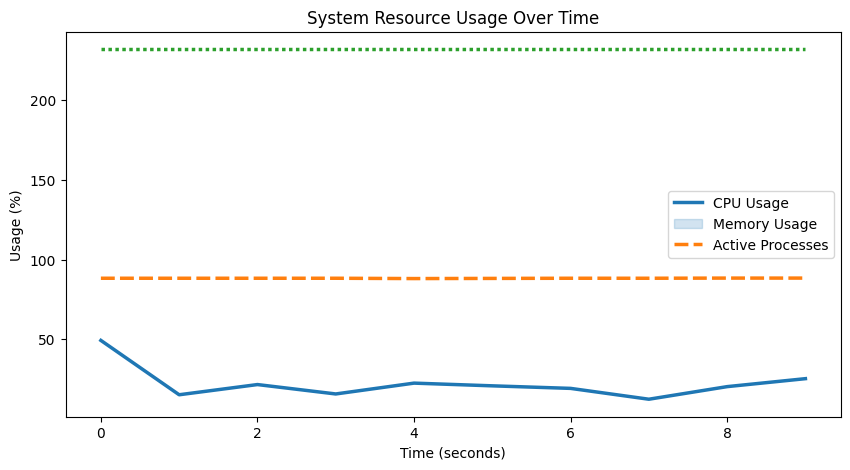

In [42]:
# Plot CPU and Memory usage
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, palette="tab10", linewidth=2.5)
plt.title("System Resource Usage Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Usage (%)")
plt.legend(["CPU Usage", "Memory Usage", "Active Processes"])
plt.show()


In [43]:
class Process:
    def __init__(self, pid, arrival_time, burst_time):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.completion_time = 0
        self.waiting_time = 0
        self.turnaround_time = 0

def fcfs_scheduling(processes):
    time_elapsed = 0
    for process in processes:
        if time_elapsed < process.arrival_time:
            time_elapsed = process.arrival_time
        process.completion_time = time_elapsed + process.burst_time
        process.turnaround_time = process.completion_time - process.arrival_time
        process.waiting_time = process.turnaround_time - process.burst_time
        time_elapsed = process.completion_time
    
    return processes

# Example process list
process_list = [Process(1, 0, 5), Process(2, 1, 3), Process(3, 2, 8)]
scheduled_processes = fcfs_scheduling(process_list)

# Display the results
for p in scheduled_processes:
    print(f"Process {p.pid}: Completion Time={p.completion_time}, Waiting Time={p.waiting_time}, Turnaround Time={p.turnaround_time}")


Process 1: Completion Time=5, Waiting Time=0, Turnaround Time=5
Process 2: Completion Time=8, Waiting Time=4, Turnaround Time=7
Process 3: Completion Time=16, Waiting Time=6, Turnaround Time=14


In [44]:
# Create a dataset with random scheduling decisions
np.random.seed(42)

data_size = 100
cpu_usage = np.random.randint(10, 100, data_size)
memory_usage = np.random.randint(20, 90, data_size)
process_count = np.random.randint(1, 50, data_size)
priority = np.random.randint(1, 5, data_size)  # Simulated priority values

# Create DataFrame
df_ml = pd.DataFrame({"CPU_Usage": cpu_usage, "Memory_Usage": memory_usage, "Active_Processes": process_count, "Priority": priority})

# Split data
X = df_ml.drop(columns=["Priority"])
y = df_ml["Priority"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

# Display results
df_results = pd.DataFrame({"Actual Priority": y_test, "Predicted Priority": predictions})
print(df_results.head())


    Actual Priority  Predicted Priority
83                2                 2.0
53                2                 2.4
70                2                 2.6
45                4                 1.9
44                1                 4.0


In [45]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Model Performance:\nMean Absolute Error: {mae:.2f}\nR² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error: 1.28
R² Score: -0.73


In [46]:
# Function to predict priority in real-time
def predict_priority(cpu, memory, processes):
    input_data = np.array([[cpu, memory, processes]])
    predicted_priority = model.predict(input_data)[0]
    return round(predicted_priority, 2)

# Example: Predict scheduling priority for current system state
cpu_now = psutil.cpu_percent(interval=1)
mem_now = psutil.virtual_memory().percent
processes_now = len(psutil.pids())

predicted = predict_priority(cpu_now, mem_now, processes_now)
print(f"Predicted Scheduling Priority: {predicted}")


Predicted Scheduling Priority: 2.8


C:\Users\aakar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
import psutil

# Collect system metrics
cpu_now = psutil.cpu_percent(interval=1)
mem_now = psutil.virtual_memory().percent
disk_now = psutil.disk_usage('/').percent
network_now = psutil.net_io_counters().bytes_sent + psutil.net_io_counters().bytes_recv
processes_now = len(psutil.pids())

# Store in a dictionary
data_point = {
    "cpu": cpu_now,
    "memory": mem_now,
    "disk": disk_now,
    "network": network_now,
    "processes": processes_now
}

print(data_point)


{'cpu': 17.5, 'memory': 88.5, 'disk': 26.3, 'network': 1631194086, 'processes': 232}


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train the final model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [49]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)
predictions = xgb_model.predict(X_test)
print(predictions)  # Explicitly print the output



[1.6267906 2.5054765 2.1865394 2.0078948 3.9164155 2.0427945 1.972216
 1.9590486 2.4049206 3.693372  2.2286267 2.8841734 1.7947074 1.6974627
 2.2541041 4.38697   1.6062955 2.7272553 3.9428468 1.5406268]


In [50]:

import pandas as pd
import os

file_path = "system_usage_data.csv"
data_point = {"cpu": 45.2, "memory": 67.8, "processes": 120, "priority": 2.5}
df = pd.DataFrame([data_point])

# Check if file exists to decide whether to write headers
if not os.path.exists(file_path):
    df.to_csv(file_path, mode='w', header=True, index=False)  # Write with headers
else:
    df.to_csv(file_path, mode='a', header=False, index=False)  # Append without headers

print(f"Data successfully added to {file_path} ✅")



Data successfully added to system_usage_data.csv ✅
